# Where Does Foreign Aid Go?
By Chris Callahan and Mikey Sison

[Website Link](https://chriscallahan99.github.io/DataScience_Final_Project/)

Datasets Used for Project: 
[Gapminder](https://www.gapminder.org/data/), 
[US Gov Foreign Assistance](https://foreignassistance.gov/
)

In [1]:
%pip install geopandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
## IMPORTS ##

# Load Numpy
import numpy as np

# Load os
import os

# Load Pandas
import pandas as pd

# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt

# Load Seaborn
import seaborn as sns; sns.set_theme()



# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
os.chdir("Foreign-Aid-Country-Data")

## Foreign Aid by Country data from ForeignAssistance.gov

Our first dataset comes from the foreign assistance webpage from the U.S. government. We will be focusing on the amount of foreign aid the United States gives to other countries, per year, and to which categories of support this money is going, among others. The question we want to answer with this dataset is "Which category, whether it be economic, health-related, or education, does funding go to for each country?" This leads us to the next question we aim to answer, "Does monetary aid in these specific categories lead to significant, measurable improvements in these areas, and what other metrics are secondarrily correlated to the aid disbursements?" 

Our second data set (which is not included in Milestone 1) is the GW13 dataset from the World Health Organization which includes many indicators that correlate to the public health of a country. We want to see how much these different indicators improve with U.S. funding.



The link below describes the data and columns gathered from ForeignAssistance.gov. 

<a href= 'https://s3.amazonaws.com/files.explorer.devtechlab.com/DataDictionary_ForeignAssistancegov.pdf'> https://s3.amazonaws.com/files.explorer.devtechlab.com/DataDictionary_ForeignAssistancegov.pdf </a>

#### Example Query
![FAgovEthiopiaQuery.png](docs/assets/FAgovEthiopiaQuery.png)

Figure 1: The image above is an example query of the foreign aid given to Ethiopia over from 2018 to 2022


### Reading in Country data

Here, we are reading in the country data from our queries on ForeignAssistance.gov. Each of the queries encompass non-military foreign aid from 2002 to 2022 fiscal years. 

We chose countries in low to middle income groups with one to two per continent/region and low military assistance.
* **Europe**: Moldova, Turkey
* **Asia**: Myanmar
* **Middle East**: Yemen
* **Africa**: Ethiopia
* **South America**: Ecuador
* **North/Central America**: El Salvador, Haiti


#### Focus areas
We will be focusing on two datasets from the ForeignAssistance.gov website: the summary data and country-specific data. Each row in the summary describes a country and the fiscal year. Each entity contains data on the transaction type, Transaction Type, Fiscal Year, current amount (in USD), and constant amount (in USD). We are planning on using this data from the summary as a reference to determine how much money is irrelevant to our study (non-military/defense spending).


In [4]:
#foreign_aid_country_summary_data = pd.read_csv('US_foreign_aid_summary.csv')

In [5]:
# Due to programming on different operating systems (windows, mac)
# Need to change slash chars based on the system to read dfs correctly

if(os.name == "nt"):
    slash_char = "\\"
else:
    slash_char = "/"

Ethiopia_foreign_aid_data = pd.read_csv('.' + slash_char + 'Africa' + slash_char + 'Ethiopia_2022-2002_Econ_Other.csv')
Moldova_foreign_aid_data = pd.read_csv('.' + slash_char + 'Europe' + slash_char + 'Moldova_2022-2002_Econ_Other.csv')
Yemen_foreign_aid_data = pd.read_csv('.' + slash_char + 'Middle-East' + slash_char + 'Yemen_2022-2002_Econ_Other.csv')
Ecuador_foreign_aid_data = pd.read_csv('.' + slash_char + 'South-America' + slash_char + 'Ecuador_2022-2002_Econ_Other.csv')
El_Salvador_foreign_aid_data = pd.read_csv('.' + slash_char + slash_char + 'North-America' + slash_char + 'El_Salvador_2022-2002_Econ_Other.csv')
Haiti_foreign_aid_data = pd.read_csv('.' + slash_char + slash_char + 'North-America' + slash_char +slash_char + 'Haiti_2022-2002_Econ_Other.csv')

countries = [Ethiopia_foreign_aid_data, Moldova_foreign_aid_data,
             Yemen_foreign_aid_data, Ecuador_foreign_aid_data, El_Salvador_foreign_aid_data,
            Haiti_foreign_aid_data] # For ease of looping

Ethiopia_foreign_aid_data

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Activity Name,Activity Description,Activity Project Number,Activity Start Date,Activity End Date,Transaction Type ID,Transaction Type Name,Fiscal Year,Current Dollar Amount,Constant Dollar Amount
0,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Title II Emergency Program,Title II Emergency Program through a partner o...,720BHA22CA00005,NaN,NaN,2,Obligations,2022,113052149,109155305
1,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Emergency food assistance,Emergency humanitarian food and nutirition ass...,720BHA22IO00038,NaN,2023-03-09,2,Obligations,2022,77740000,75060346
2,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Title II Emergency Program,Title II Emergency Program through a partner o...,720BHA22IO00034,NaN,NaN,2,Obligations,2022,57420571,55441315
3,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Emergency food assistance,Emergency humanitarian food and nutirition ass...,720BHA22IO00045,NaN,2022-12-31,2,Obligations,2022,44500000,42966110
4,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Humanitarian assistance,Humanitarian assistance funding.,720BHA22GR00071,NaN,2024-09-30,2,Obligations,2022,39493563,38132242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13582,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,FFP/CRITICAL FOOD NEEDS OF TARGETED GROUPS MET,Critical food needs of targeted groups met,962-001,NaN,NaN,2,Obligations,2002,-69035,-96892
13583,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Mitigate the effects of disaster,Mitigate the Effects of Disaster,663-011,NaN,NaN,2,Obligations,2002,-228000,-320000
13584,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Mitigate the effects of disaster,Mitigate the Effects of Disaster,663-011,NaN,NaN,2,Obligations,2002,-229909,-322679
13585,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Essential Services for Health,Essential Services for Health,663-002,NaN,NaN,2,Obligations,2002,-284530,-399340


Figure 2: The observation for each entity is the Activity that is being funded.

### Exploratory Data Analysis

First, we are going to focus our attention on columns of importance. This means dropping columns that are for internal US gov use and other secondary IDs that are not of use to our analysis.  

In [6]:
columns_to_drop = ['Transaction Type ID',
        'Foreign Assistance Objective ID',
        'Implementing Partner Category ID',
        'Implementing Partner Category Name',
        'Implementing Partner Sub-category ID',
        'Implementing Partner Sub-category Name', 
        'Implementing Partner ID',
        'Implementing Partner Name', 
        'International Category ID',
        'International Category Name',
        'International Sector Code',
        'International Sector Name', 
        'International Purpose Code',
        'Managing Agency ID',
        'Managing Sub-agency or Bureau ID',
        'Activity Project Number',
        'Managing Sub-agency or Bureau Name',
        'Aid Type Group ID',
        'Funding Agency ID',
        'Submission ID', 
        'Funding Acount ID',
        'Activity ID',
        'Income Group Acronym',
        'Managing Sub-agency or Bureau Acronym',
        'US Category ID',
        'US Category Name',
    ]


for country in countries:
    for col in columns_to_drop:
        country.drop(labels= col, axis= 'columns', inplace= True)

Ethiopia_foreign_aid_data.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Managing Agency Acronym', 'Managing Agency Name',
       'International Purpose Name', 'US Sector ID', 'US Sector Name',
       'Funding Account Name', 'Funding Agency Name', 'Funding Agency Acronym',
       'Foreign Assistance Objective Name', 'Aid Type Group Name',
       'Activity Name', 'Activity Description', 'Activity Start Date',
       'Activity End Date', 'Transaction Type Name', 'Fiscal Year',
       'Current Dollar Amount', 'Constant Dollar Amount'],
      dtype='object')

Next, we want to highlight the income of each of the countries to verify that the countries chosen are likely to receive a sizeable amount and diverse range of US foreign aid. 

In [7]:
for country in countries:
    display(country['Country Name'][0] + ': '+ country['Income Group Name'][0])

'Ethiopia: Low Income Country'

'Moldova: Lower Middle Income Country'

'Yemen: Low Income Country'

'Ecuador: Upper Middle Income Country'

'El Salvador: Lower Middle Income Country'

'Haiti: Low Income Country'

Furthermore, we want to get rid of entries / aid projects that come from military sources since they would not have impacts on the metrics we are interested in.

In [8]:
# Drop rows unrelated to economic/health development
for i, country in enumerate(countries):
    country.drop(country[country["Managing Agency Name"] == 'Department of Defense'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of Homeland Security'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of Justice'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of the Army'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of the Interior'].index, inplace = True)
    # Drop row if dollar amount is less than 0 as this is usually a redaction of funds
    country.drop(country[country["Constant Dollar Amount"] < 0 ].index, inplace = True)


Fun fact: The U.S. has given over $35 million to ethiopia for election related activities 


In [9]:
Ethiopia_Election_df = Ethiopia_foreign_aid_data[Ethiopia_foreign_aid_data['Activity Name'].str.contains('Election')]

money_sum = Ethiopia_Election_df["Constant Dollar Amount"].sum()

print('${:,.2f}'.format(money_sum))


$37,957,689.00


Let's plot the amount of foreign aid received by country. This exploration will help us determine which of the countries chosen recieve the most aid. Make sure to pay attention to the axis labels! 

Text(0.5, 1.0, 'Yemen')

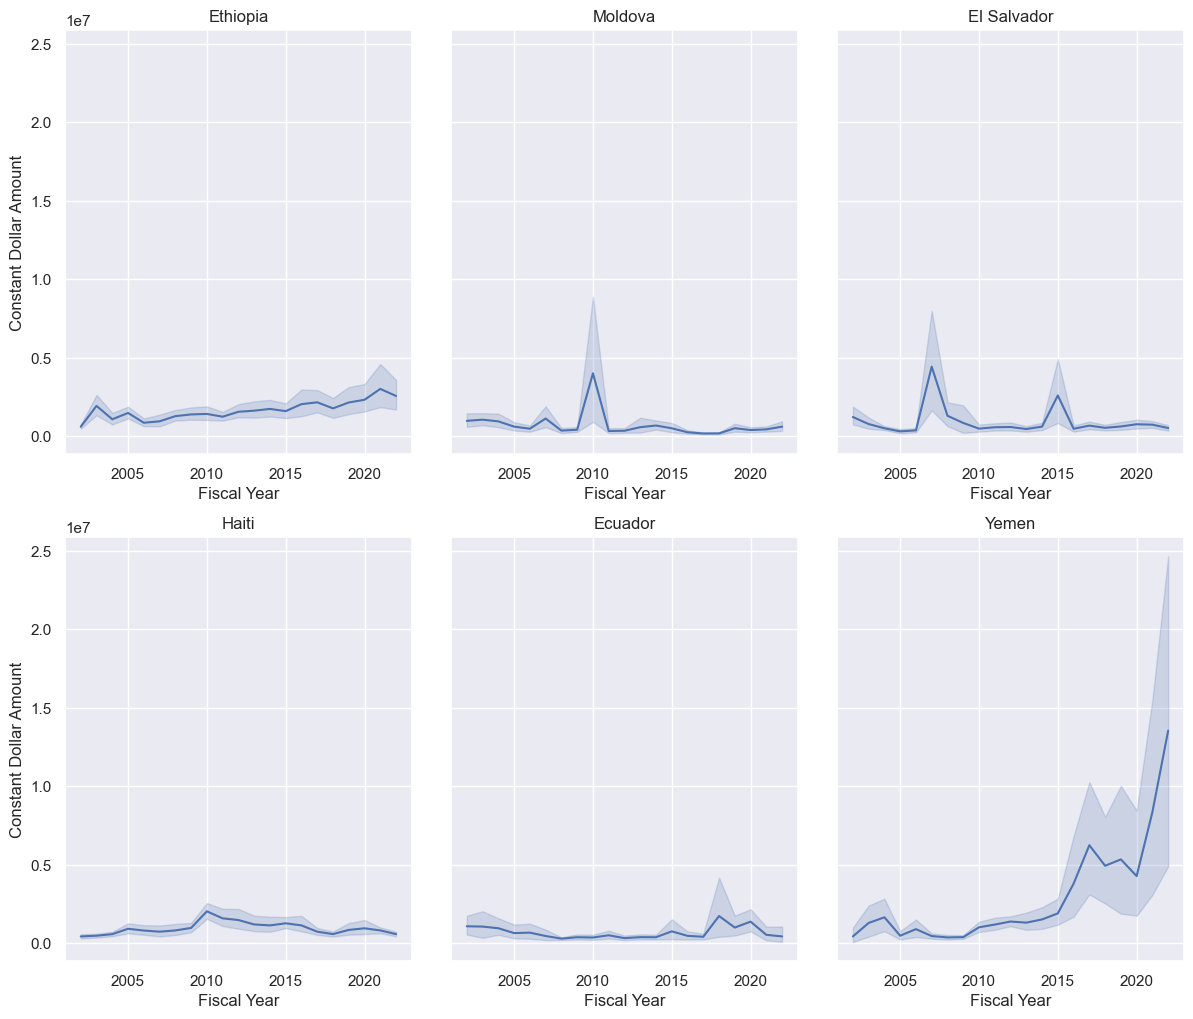

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12,10) , sharey= True)
fig.tight_layout(h_pad= 3)

sns.lineplot(Ethiopia_foreign_aid_data, x= 'Fiscal Year', y= 'Constant Dollar Amount', ax= axes[0,0]).set_title('Ethiopia')
sns.lineplot(Moldova_foreign_aid_data , x= 'Fiscal Year', y= 'Constant Dollar Amount', ax= axes[0,1]).set_title('Moldova')
sns.lineplot(Haiti_foreign_aid_data , x= 'Fiscal Year', y= 'Constant Dollar Amount', ax= axes[1,0]).set_title('Haiti')
sns.lineplot(Ecuador_foreign_aid_data , x= 'Fiscal Year', y= 'Constant Dollar Amount', ax= axes[1,1]).set_title('Ecuador')
sns.lineplot(El_Salvador_foreign_aid_data, x= 'Fiscal Year', y= 'Constant Dollar Amount', ax= axes[0,2]).set_title('El Salvador')
sns.lineplot(Yemen_foreign_aid_data, x= 'Fiscal Year', y= 'Constant Dollar Amount', ax= axes[1,2]).set_title('Yemen')


Graph 1: As we can see, Yemen receives the most US aid in the recent years. Next, let's examine which agencies give the most aid. This will allow us to determine which category, health or economic, the country receives the most aid in. 

In [11]:
# Get the top 5 agencies by money spent 

country_by_funding_agency = []
for i, country  in enumerate(countries):
    # Groupby funding agency to get money spent per agency.
    country_by_funding_agency.append(pd.DataFrame(country.groupby('Funding Agency Acronym')['Constant Dollar Amount'].sum()))
    country_by_funding_agency[i].reset_index(inplace=True) # Reset index for plotting
    # Sort and locate the top 5 agencies by money spent
    country_by_funding_agency[i] = country_by_funding_agency[i].sort_values(ascending= False, by= 'Constant Dollar Amount')
    country_by_funding_agency[i] = country_by_funding_agency[i].iloc[0:5] 

Text(0.5, 1.0, 'Haiti')

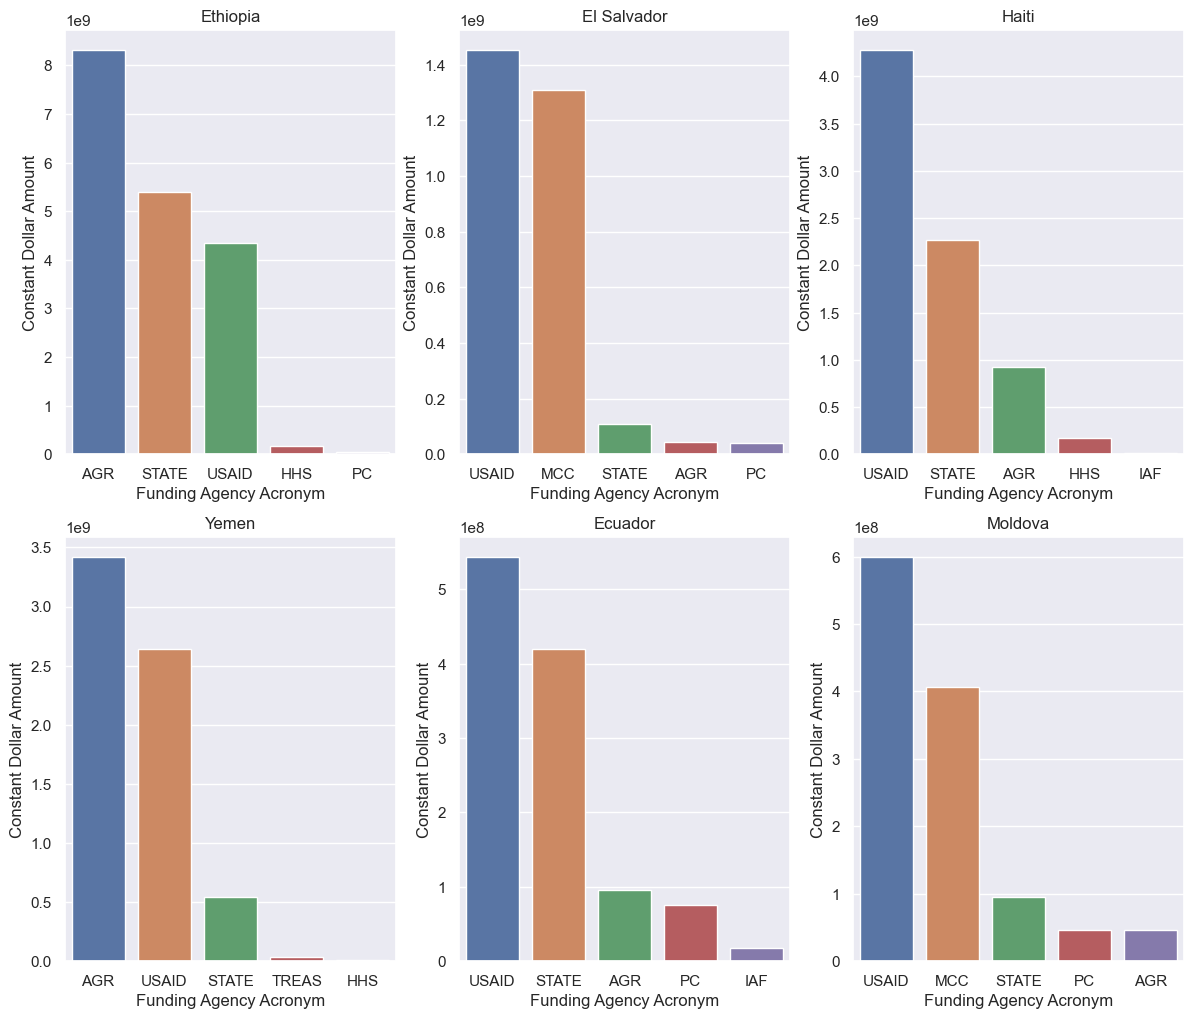

In [12]:
# Plotting the top 5 agencies by money spent
fig, axes = plt.subplots(2, 3, figsize=(12,10))
fig.tight_layout(h_pad= 3)

sns.barplot(data= country_by_funding_agency[0] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount',  ax= axes[0,0]).set_title('Ethiopia')
sns.barplot(data= country_by_funding_agency[1] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount',  ax= axes[1,2]).set_title('Moldova')
sns.barplot(data= country_by_funding_agency[2] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount',  ax= axes[1,0]).set_title('Yemen')
sns.barplot(data= country_by_funding_agency[3] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount',  ax= axes[1,1]).set_title('Ecuador')
sns.barplot(data= country_by_funding_agency[4] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount',  ax= axes[0,1]).set_title('El Salvador')
sns.barplot(data= country_by_funding_agency[5] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount',  ax= axes[0,2]).set_title('Haiti')




Graph 3: Bar charts describing the amount of money spent by agency.

### Closing thoughts 


#### Collaboration Plan
Our collaboration plan is to meet once or twice a week mostly in-person as needed. We’ve been meeting up at the library and will likely continue to do so. If we have an increased workload to complete, we will decide to either meetup for longer or assign tasks to finish by the next meeting. 

#### Challenges With Data

A key challenge we came across was getting recent data from gapminder as many of their datasets only had data up until 2010, however, our timeframe was up until 2020. So we found the source of the health data from Gapminder, which came from the World Health Organization and found more up-to-date datasets which contained data up to 2020.

# Milestone 2

## GW13 Dataset

Our second datatset comes from the [GW13 WHO Dataset](https://www.who.int/data/inequality-monitor/data#PageContent_C160_Col00), which contains health markers of interest, stratified by country and year. We did most of the basic filtering of data in Excel as not to clutter the report. We plan on using this data to contextualize and predict the importance of various funding and their quantifible impact on health outcomes in our countries of interest. 

In [13]:
gw19_df = pd.read_excel(".." + slash_char + "WHO_datasets"+ slash_char + "GW19_2002_2020_filtered.xlsx")
gw19_df

,setting,year,indicator_abbr,indicator_name,dimension,subgroup,estimate,population,indicator_scale
0,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,Sex,Female,2.0,NaN,100
1,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,Sex,Male,7.0,NaN,100
2,Ecuador,2002,bp,Prevalence of hypertension among adults aged 3...,Sex,Female,25.0,NaN,100
3,Ecuador,2002,bp,Prevalence of hypertension among adults aged 3...,Sex,Male,23.0,NaN,100
4,Ecuador,2002,hh_san_sm,Population using safely managed sanitation ser...,Place of residence,Rural,44.0,5110442.0,100
...,...,...,...,...,...,...,...,...,...
5438,Yemen,2020,tb_incidence,TB incidence (new infections per 100 000 popul...,Sex,Female,44.0,14800983.0,100000
5439,Yemen,2020,tb_incidence,TB incidence (new infections per 100 000 popul...,Sex,Male,53.0,15024985.0,100000
5440,Yemen,2020,u5mr,Under-five mortality rate (deaths per 1000 liv...,Sex,Female,55.0,NaN,1000
5441,Yemen,2020,u5mr,Under-five mortality rate (deaths per 1000 liv...,Sex,Male,64.0,NaN,1000


In [14]:
safe_water_percent = gw19_df[gw19_df['indicator_name'] == "Population using safely managed drinking water services (%)"]
safe_water_percent = safe_water_percent[safe_water_percent["setting"] == "Ethiopia"]

safe_water_percent_rural = safe_water_percent[safe_water_percent["subgroup"] == "Rural"]
safe_water_percent_urban = safe_water_percent[safe_water_percent["subgroup"] == "Urban"]

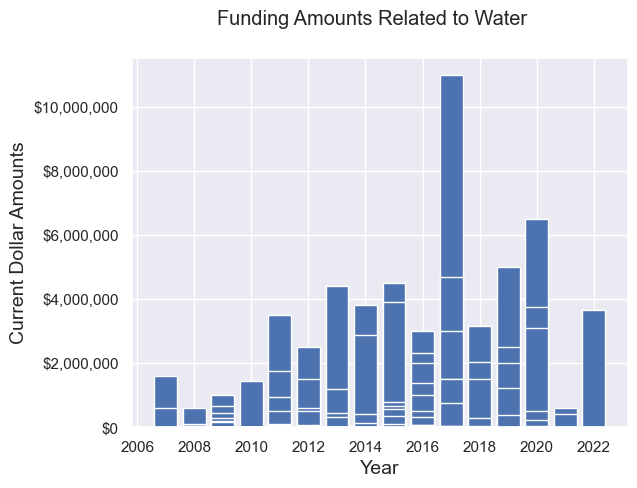

In [15]:
import matplotlib.ticker as mtick

Ethiopia_water_spending = Ethiopia_foreign_aid_data[Ethiopia_foreign_aid_data['International Purpose Name'].str.contains('water', case=False)]

x = Ethiopia_water_spending["Fiscal Year"]
y = Ethiopia_water_spending["Current Dollar Amount"]

fig, ax = plt.subplots()
fig.suptitle('Funding Amounts Related to Water')

ax.bar(x, y)
ax.ticklabel_format(useOffset=False, style='plain')


fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.xlabel('Year', fontsize=14)
plt.ylabel('Current Dollar Amounts', fontsize=14)

plt.show()

[Text(0.5, 20.049999999999997, 'Year'),
 Text(310.5454545454545, 0.5, '% with Clean Drinking Water')]

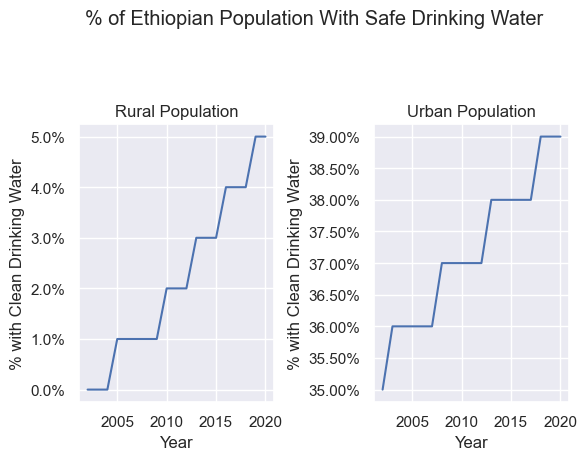

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('% of Ethiopian Population With Safe Drinking Water')
fig.tight_layout(pad=3)


x = safe_water_percent_rural["year"]
y = safe_water_percent_rural["estimate"]

z = safe_water_percent_urban["year"]
w = safe_water_percent_urban["estimate"]


ax1.plot(x, y)
ax1.set_title('Rural Population')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

ax1.set(xlabel='Year', ylabel='% with Clean Drinking Water')


ax2.plot(z, w)
ax2.set_title('Urban Population')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set(xlabel='Year', ylabel='% with Clean Drinking Water')


### Cereal Production dataset
Cereal production is vital to a country's self-sustainability and ability to feed its own without heavy reliance on foreign imports. Moreover, after careful examination of the dataset (see figure 2 for more details), many activity descriptions discuss improving food security. Many of the studied countries fall into the last places in the [Global Food Security Index](https://impact.economist.com/sustainability/project/food-security-index#rankings-and-trends 'Food Security Inded'). This fact makes domestic food production of prime importance for many of these countries. We look to examine if changes in aid donation affects the amount of cereal produced. We will only examine entries that contain certain indicators of food assistance. 

From looking at the dataset, we have concluded that the following words are indicators of the entity being for food assistance:
* 'Food Assistance'
* 'Emergency food assistance'
* And any other entities containing 'food' in the 'International Purpose Name' column.

![food_security_index.jpg](docs/assets/food_security_index.jpg)
Figure 3: Global Food Security Index 99th-113th ranked countries in food security. Here lies 3 of our countries: Ethiopia at 100th, Yemen at 111th, and Haiti at 112th.

#### Obtaining the dataset

In [17]:
os.chdir(".." + slash_char + "food_datasets")

cereal_df = pd.read_csv('cereal-production.csv')

In [18]:
cereal_df.head()

,Entity,Year,Cereals Production (tonnes)
0,Ecuador,2002,2057298
1,Ecuador,2003,2055013
2,Ecuador,2004,2607223
3,Ecuador,2005,2303958
4,Ecuador,2006,2278620


#### Getting the funding amounts related to food

In [19]:
food_aid = pd.DataFrame()


Ethiopia_cereal_data = Ethiopia_foreign_aid_data.loc[Ethiopia_foreign_aid_data['International Purpose Name'].str.contains(
                            'food', case=False)][['Current Dollar Amount', 'Fiscal Year']].groupby('Fiscal Year').sum()

Yemen_cereal_data    = Yemen_foreign_aid_data.loc[Yemen_foreign_aid_data['International Purpose Name'].str.contains(
                            'food', case=False)][['Current Dollar Amount', 'Fiscal Year']].groupby('Fiscal Year').sum()

Haiti_cereal_data    = Haiti_foreign_aid_data.loc[Haiti_foreign_aid_data['International Purpose Name'].str.contains(
                            'food', case=False)][['Current Dollar Amount', 'Fiscal Year']].groupby('Fiscal Year').sum()                     

Moldova_foreign_aid_data = Moldova_foreign_aid_data.loc[Moldova_foreign_aid_data['International Purpose Name'].str.contains(
                            'food', case=False)][['Current Dollar Amount', 'Fiscal Year']].groupby('Fiscal Year').sum() 

El_Salvador_foreign_aid_data = El_Salvador_foreign_aid_data.loc[El_Salvador_foreign_aid_data['International Purpose Name'].str.contains(
                            'food', case=False)][['Current Dollar Amount', 'Fiscal Year']].groupby('Fiscal Year').sum()

Ecuador_foreign_aid_data = Ecuador_foreign_aid_data.loc[Ecuador_foreign_aid_data['International Purpose Name'].str.contains(
                            'food', case=False)][['Current Dollar Amount', 'Fiscal Year']].groupby('Fiscal Year').sum() 




# Add the country codes into the df
Ethiopia_cereal_data['Country Name'] = 'Ethiopia'
Yemen_cereal_data['Country Name'] = 'Yemen'
Haiti_cereal_data['Country Name'] = 'Haiti'
Moldova_foreign_aid_data['Country Name'] = 'Moldova'
El_Salvador_foreign_aid_data['Country Name'] = 'El Salvador'  
Ecuador_foreign_aid_data['Country Name'] = 'Ecuador'


food_aid = pd.concat([Ethiopia_cereal_data,
                        Yemen_cereal_data,
                        Haiti_cereal_data,  
                        Moldova_foreign_aid_data,
                        El_Salvador_foreign_aid_data,
                        Ecuador_foreign_aid_data                     
                     ])

# Lets break this down-- 
# First, we locate the column International Purpose Name and changing it into a string in order to check if it contains the string 'food', not case-senstitive. 
# Second, we slice the 'Current Dollar Amount' and 'Fiscal Year' from the dataframe into its own data frame.
# Next, we group by the 'Fiscal Year' and sum to get all of the aid spend on food in a given year, by country.
# Finally, we add the country names and concatenate into a single dataframe.



food_aid.head()

,Current Dollar Amount,Country Name
Fiscal Year,,
2002,77724560,Ethiopia
2003,368507947,Ethiopia
2004,254435836,Ethiopia
2005,467729117,Ethiopia
2006,150265025,Ethiopia


Now, in order to effectively merge them, we will merge their names and year in order to get a single key that can be used to merge upon. 

In [20]:
food_aid.reset_index(inplace= True)

food_aid['Fiscal Year'] = food_aid['Fiscal Year'].astype('string')
food_aid['Year_Name'] = food_aid['Country Name'] + food_aid['Fiscal Year']

food_aid.head()

,Fiscal Year,Current Dollar Amount,Country Name,Year_Name
0,2002,77724560,Ethiopia,Ethiopia2002
1,2003,368507947,Ethiopia,Ethiopia2003
2,2004,254435836,Ethiopia,Ethiopia2004
3,2005,467729117,Ethiopia,Ethiopia2005
4,2006,150265025,Ethiopia,Ethiopia2006


In [21]:
cereal_df['Year'] = cereal_df['Year'].astype('string')
cereal_df['Year_Name'] = cereal_df['Entity'] + cereal_df['Year']
cereal_df.head()

,Entity,Year,Cereals Production (tonnes),Year_Name
0,Ecuador,2002,2057298,Ecuador2002
1,Ecuador,2003,2055013,Ecuador2003
2,Ecuador,2004,2607223,Ecuador2004
3,Ecuador,2005,2303958,Ecuador2005
4,Ecuador,2006,2278620,Ecuador2006


Merge the two dataframes on 'Year_Name' with regards to the food_aid frame.

In [22]:
aid_cereal_merge = food_aid.merge(cereal_df, on= 'Year_Name', how= 'left')

aid_cereal_merge.head()

,Fiscal Year,Current Dollar Amount,Country Name,Year_Name,Entity,Year,Cereals Production (tonnes)
0,2002,77724560,Ethiopia,Ethiopia2002,Ethiopia,2002,9000335.0
1,2003,368507947,Ethiopia,Ethiopia2003,Ethiopia,2003,9532780.0
2,2004,254435836,Ethiopia,Ethiopia2004,Ethiopia,2004,10140082.0
3,2005,467729117,Ethiopia,Ethiopia2005,Ethiopia,2005,12749986.0
4,2006,150265025,Ethiopia,Ethiopia2006,Ethiopia,2006,12672350.0


In [23]:
# Delete redundant columns after the merge
del aid_cereal_merge['Year']
del aid_cereal_merge['Entity']
aid_cereal_merge.head()

,Fiscal Year,Current Dollar Amount,Country Name,Year_Name,Cereals Production (tonnes)
0,2002,77724560,Ethiopia,Ethiopia2002,9000335.0
1,2003,368507947,Ethiopia,Ethiopia2003,9532780.0
2,2004,254435836,Ethiopia,Ethiopia2004,10140082.0
3,2005,467729117,Ethiopia,Ethiopia2005,12749986.0
4,2006,150265025,Ethiopia,Ethiopia2006,12672350.0


### Plotting the Cereal Production and Aid Given Relationship

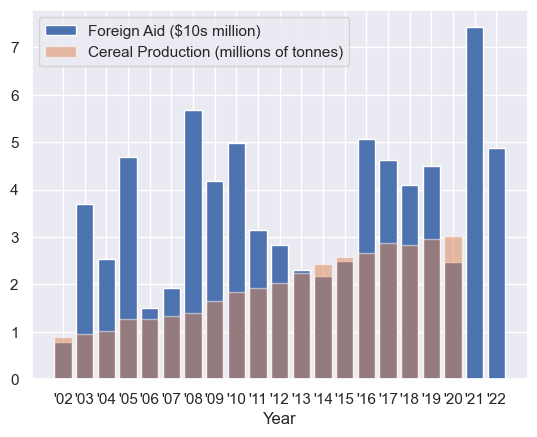

In [45]:
ethiopia_cereal_merged = aid_cereal_merge[aid_cereal_merge['Country Name'] == 'Ethiopia']

y1 = ethiopia_cereal_merged['Current Dollar Amount'].apply(lambda x: x / 10**8)
y2 = ethiopia_cereal_merged['Cereals Production (tonnes)'].apply(lambda x: x / 10**7)
x = "'" + ethiopia_cereal_merged['Fiscal Year'].str.slice(start= 2)

fig, ax = plt.subplots()
ax.set_xlabel('Year')

ax.bar(x, y1, label='Foreign Aid ($10s million)' )
ax.bar(x, y2, label='Cereal Production (millions of tonnes)', alpha= 0.5)
ax.legend()